In [1]:
from sklearn.svm import SVC
from sentence_transformers import SentenceTransformer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
%run -i "../util/util_simple_classifier.ipynb"

In [3]:
# Same as 4.4
train_df = pd.read_json("../data/bbc_train.json")
test_df = pd.read_json("../data/bbc_test.json")
train_df.sample(frac=1)

,text,label,label_text,text_tokenized,text_clean
1067,air passengers win new eu rights air passenger...,1,business,"[air, passengers, win, new, eu, rights, air, p...",air passengers win new eu rights air passenger...
590,boeing unveils new 777 aircraft us aircraft fi...,1,business,"[boeing, unveils, new, 777, aircraft, us, airc...",boeing unveils new 777 aircraft us aircraft fi...
1059,halo 2 sells five million copies microsoft is ...,0,tech,"[halo, 2, sells, five, million, copies, micros...",halo 2 sells five million copies microsoft cel...
920,ex-pm lord callaghan dies aged 92 former labou...,4,politics,"[ex-pm, lord, callaghan, dies, aged, 92, forme...",ex-pm lord callaghan dies aged 92 former labou...
2059,mauresmo opens with victory in la amelie maure...,2,sport,"[mauresmo, opens, victory, la, amelie, mauresm...",mauresmo opens victory la amelie mauresmo mari...
...,...,...,...,...,...
773,france starts digital terrestrial france has b...,0,tech,"[france, starts, digital, terrestrial, france,...",france starts digital terrestrial france becom...
2177,hospital suspends no welsh plan an english h...,4,politics,"[hospital, suspends, welsh, plan, english, hos...",hospital suspends welsh plan english hospital ...
1451,us adds more jobs than expected the us economy...,1,business,"[us, adds, jobs, expected, us, economy, added,...",us adds jobs expected us economy added 337 000...
1319,asia shares defy post-quake gloom indonesian ...,1,business,"[asia, shares, defy, post-quake, gloom, indone...",asia shares defy post-quake gloom indonesian i...


In [4]:
model = SentenceTransformer('all-MiniLM-L6-v2')
def get_sentence_vector(text, model):
    sentence_embeddings = model.encode([text])
    return sentence_embeddings[0]

In [5]:
def train_classifier(X_train, y_train):
    clf = SVC(C=0.1, kernel='rbf')
    clf = clf.fit(X_train, y_train)
    return clf

In [6]:
target_names=["tech", "business", "sport", "entertainment", "politics"]
vectorize = lambda x: get_sentence_vector(x, model)
(X_train, X_test, y_train, y_test) = create_train_test_data(train_df, test_df, vectorize, column_name="text_clean")
clf = train_classifier(X_train, y_train)
print(classification_report(train_df["label"], y_train, target_names=target_names))
test_classifier(test_df, clf, target_names=target_names)

               precision    recall  f1-score   support

         tech       1.00      1.00      1.00       321
     business       1.00      1.00      1.00       408
        sport       1.00      1.00      1.00       409
entertainment       1.00      1.00      1.00       309
     politics       1.00      1.00      1.00       333

     accuracy                           1.00      1780
    macro avg       1.00      1.00      1.00      1780
 weighted avg       1.00      1.00      1.00      1780

               precision    recall  f1-score   support

         tech       0.97      0.95      0.96        80
     business       0.98      0.97      0.98       102
        sport       0.98      1.00      0.99       102
entertainment       0.96      0.99      0.97        77
     politics       0.98      0.96      0.97        84

     accuracy                           0.98       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.98      0.98      0.98       445



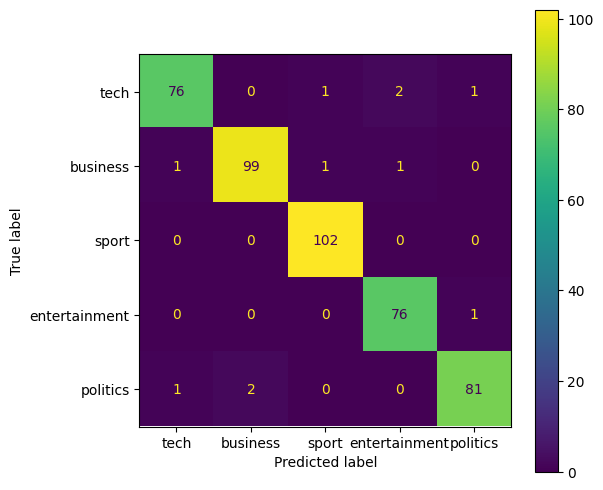

In [16]:
num_to_text_mapping = {0: "tech", 1: "business", 2: "sport", 3: "entertainment", 4: "politics"}
test_df["pred_label"] = test_df["prediction"].map(num_to_text_mapping)
cm = confusion_matrix(test_df["label_text"], test_df["pred_label"], labels=target_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax)


In [17]:
from wordcloud import WordCloud, STOPWORDS

In [18]:
%run -i "../util/file_utils.ipynb"

In [23]:
text_file = "../data/nvidia2025q3.txt"
text = read_text_file(text_file)

stopwords = set(STOPWORDS)
stopwords.update(['thank', 'year', 'quarter', 'will', 'now'])

In [24]:
# Create world cloud function
def create_wordcloud(text, stopwords, filename, apply_mask=None):
    if apply_mask is not None:
        wc = WordCloud(background_color="white", max_words=100, stopwords=stopwords, mask=apply_mask)
        wc.generate(text)
        wc.to_file(filename)
        plt.figure(figsize=(8, 8))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        wc = WordCloud(background_color="white", max_words=100, stopwords=stopwords)
        wc.generate(text)
        wc.to_file(filename)
        plt.figure(figsize=(8, 8))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        plt.show()

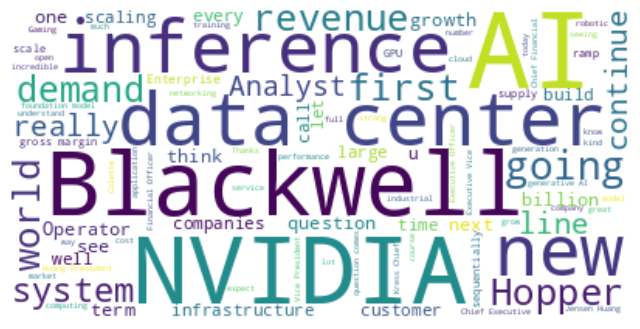

In [25]:
create_wordcloud(text, stopwords, "../reports/nvidia_wordcloud.png")

In [26]:
import numpy as np
from PIL import Image

In [29]:
nvidia_img = Image.open("../data/nvidia.jpg")
nvidia_mask = np.array(nvidia_img)

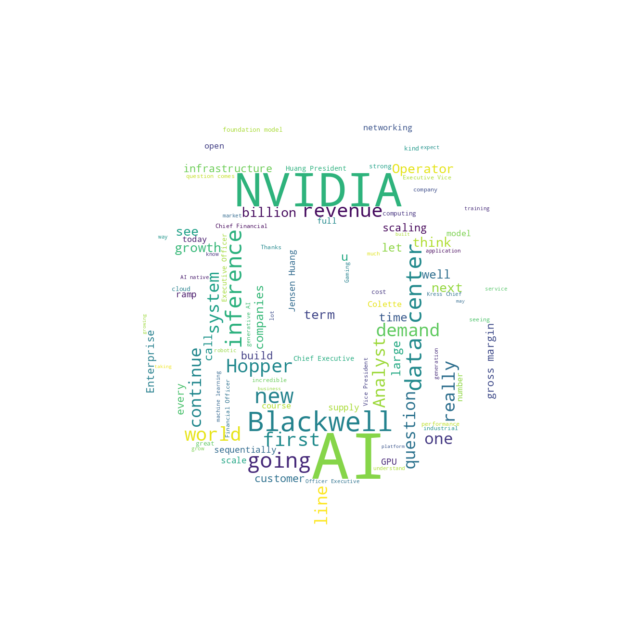

In [30]:
create_wordcloud(text, stopwords, "../reports/nvidia_wordcloud_mask.png", apply_mask=nvidia_mask)